In [121]:
%load_ext autoreload
%autoreload 2
import sys
if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import json
from signatures.tensor_algebra import TensorAlgebra
from signatures.tensor_sequence import TensorSequence
from signatures.alphabet import Alphabet
from signatures.numba_utility import factorial
from signatures.stationary_signature import discount_ts, stationary_signature_from_path

plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 6, 6)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
ta = TensorAlgebra(dim=2)

Compiling...
Compilation finished.


In [123]:
lam = 10
T = 10
n_grid = 10000
trunc = 5
dim = 2
alphabet = Alphabet(dim)

T0 = -50
t_grid = np.unique(np.concatenate([np.linspace(T0, 0, n_grid), np.linspace(0, T, n_grid)]))

In [124]:
rng = np.random.default_rng(seed=42)
W = np.concatenate([[0], np.cumsum(rng.normal(size=len(t_grid) - 1) * np.sqrt(np.diff(t_grid)))])
path = np.vstack([t_grid, W]).T

In [133]:
%%time

StatSig = stationary_signature_from_path(path=path, trunc=trunc, t_grid=t_grid, lam=lam)
StatSig2 = stationary_signature_from_path(path=path, trunc=trunc, t_grid=t_grid, lam=1)

CPU times: user 23.3 s, sys: 43.9 ms, total: 23.4 s
Wall time: 23.3 s


In [126]:
N = trunc
_ = ta.from_dict({"": 1}, trunc=N)
_1 = ta.from_dict({"1": 1}, trunc=N)
_2 = ta.from_dict({"2": 1}, trunc=N)
_11 = ta.from_dict({"11": 1}, trunc=N)
_12 = ta.from_dict({"12": 1}, trunc=N)
_21 = ta.from_dict({"21": 1}, trunc=N)
_22 = ta.from_dict({"22": 1}, trunc=N)
_111 = ta.from_word("111", trunc=N)
_222 = ta.from_word("222", trunc=N)
_221 = ta.from_word("221", trunc=N)
_121 = ta.from_word("121", trunc=N)
_211 = ta.from_word("211", trunc=N)
_2222 = ta.from_word("2222", trunc=N)
_22222 = ta.from_word("22222", trunc=N)

In [132]:
(StatSig @ _22).mean()

(0.03354181749868099+0j)

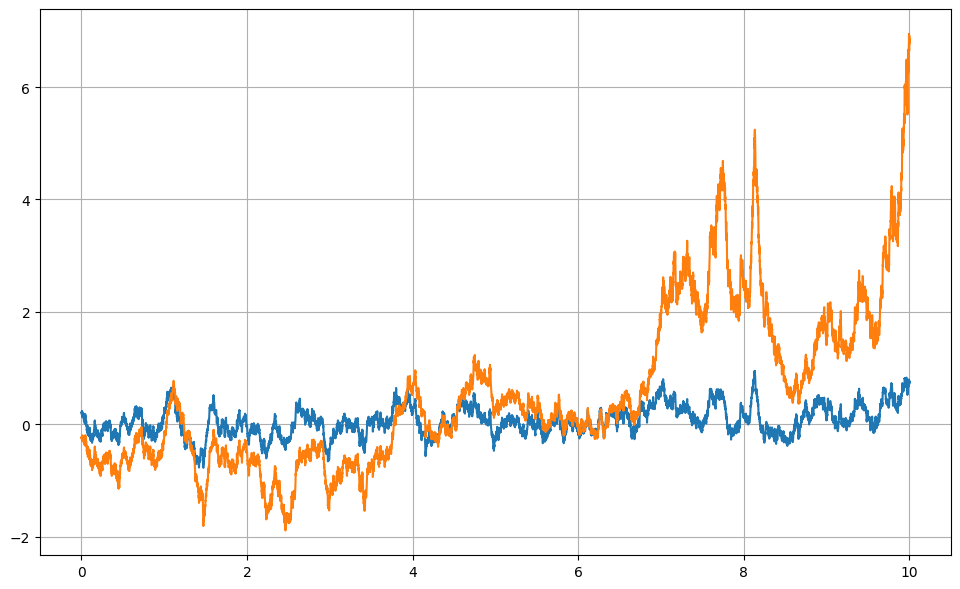

In [136]:
fig, ax = plt.subplots()

ax.plot(t_grid[t_grid >= 0], StatSig @ (_2 + _222 + 4 * factorial(5) * _22222 * 0))
ax.plot(t_grid[t_grid >= 0], StatSig2 @ (_2 + _222))